In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### Introduction to Dataset

In [5]:
#import
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [8]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Detecting Outliers:

We will use this function later in the notebook to print out values of outliers.

In [41]:
def outliers(df, variable, ub, lb):
    print("Outliers Detected")
    outlier = df.loc[(df[variable] > ub) | (df[variable] < lb), variable].sort_values()
    print(outlier)
    print("\nTotal number of ourliers detected:{}\n".format(len(outlier)))

#### 1. Mean +/-  n Standard Deviation Method

In [42]:
def zscore_method(df, cols, thr):
    
    for col in cols:
        
        mean = df[col].mean()
        std = df[col].std()
        
        upper_bound = mean + thr*std
        lower_bound = mean - thr*std
        
        # print out the outliers
        print("For " + col + ":\n")
        outliers(df, col, upper_bound, lower_bound)

In [73]:
# calling the function and timing it
%time zscore_method(boston_df, ["RM"], 3)

For RM:

Outliers Detected
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
273    7.691
180    7.765
162    7.802
280    7.820
98     7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected:31

Wall time: 6.02 ms


#### 2. IQR Method

In [50]:
def iqr_method(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        # print out the outliers
        print("For " + col + ":\n")
        outliers(df, col, upper_whisker, lower_whisker)

In [54]:
# print out the outliers
%time iqr_method(boston_df, ["RM"], 1.5)

For RM:

Outliers Detected
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
180    7.765
162    7.802
280    7.820
98     7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected:30

Wall time: 6.98 ms


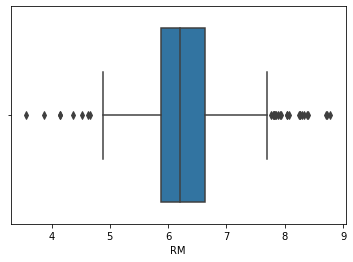

In [55]:
# we can verify the boundaries in boxplot below
sns.boxplot(boston_df.RM)

#### 3. MAD method

In [83]:
def mad_method(df, cols, thr):
    
    for col in cols:
        
        median = df[col].median()
        mad = stats.median_abs_deviation(df[col], scale="normal")
        
        upper_bound = median + thr*mad
        lower_bound = median - thr*mad
        
        # print out the outliers
        print("For " + col + ":\n")
        outliers(df, col, upper_bound, lower_bound)

In [84]:
# calling the function and timing it
%time mad_method(boston_df, ["RM"], 3)

For RM:

Outliers Detected
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
180    7.765
162    7.802
280    7.820
98     7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected:30

Wall time: 6.93 ms


#### 4. Two-stage Thresholding (2T)

##### 4.1. 2T with SD

In [75]:
def zscore_2t_method(df, cols, thr1, thr2):
    
    for col in cols:
        
        mean1 = df[col].mean()
        std1 = df[col].std()
        
        upper_bound1 = mean1 + thr1*std1
        lower_bound1 = mean1 - thr1*std1
        
        df_2T = df.loc[(df[col] <= upper_bound1) & (df[col] >= lower_bound1), :].copy()
        
        mean2 = df_2T[col].mean()
        std2 = df_2T[col].std()
        
        upper_bound2 = mean2 + thr2*std2
        lower_bound2 = mean2 - thr2*std2
        
        # print out the outliers
        print("For " + col + ":\n")
        outliers(df, col, upper_bound2, lower_bound2)

In [78]:
# calling the function and timing it
%time zscore_2t_method(boston_df, ["RM"], 3, 2.5)

For RM:

Outliers Detected
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected:23

Wall time: 6.23 ms


##### 4.2. 2T with IQR

In [81]:
def iqr_2t_method(df, cols, factor1, factor2):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr1 = q3 - q1
        
        upper_whisker1 = q3 + (factor1*iqr1)
        lower_whisker1 = q1 - (factor1*iqr1)
        
        df_2T = df.loc[(df[col] <= upper_whisker1) & (df[col] >= lower_whisker1), :].copy()
        
        q1 = df_2T[col].quantile(0.25)
        q3 = df_2T[col].quantile(0.75)
        
        iqr2 = q3 - q1
        
        upper_whisker2 = q3 + (factor2*iqr2)
        lower_whisker2 = q1 - (factor2*iqr2)
        
        # print out the outliers
        print("For " + col + ":\n")
        outliers(df, col, upper_whisker2, lower_whisker2)

In [82]:
# calling the function and timing it
%time iqr_2t_method(boston_df, ["RM"], 1.5, 1.5)

For RM:

Outliers Detected
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
388    4.880
202    7.610
282    7.645
228    7.686
273    7.691
180    7.765
162    7.802
280    7.820
98     7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected:35

Wall time: 13.6 ms


##### 4.3. 2T with MAD

In [85]:
def mad_2t_method(df, cols, thr1, thr2):
    
    for col in cols:
        
        median1 = df[col].median()
        mad1 = stats.median_abs_deviation(df[col], scale="normal")
        
        upper_bound1 = median1 + thr1*mad1
        lower_bound1 = median1 - thr1*mad1
        
        df_2T = df.loc[(df[col] <= upper_bound1) & (df[col] >= lower_bound1), :].copy()
        
        median2 = df_2T[col].median()
        mad2 = stats.median_abs_deviation(df_2T[col], scale="normal")
        
        upper_bound2 = median2 + thr2*mad2
        lower_bound2 = median2 - thr2*mad2
        
        # print out the outliers
        print("For " + col + ":\n")
        outliers(df, col, upper_bound2, lower_bound2)

In [86]:
# calling the function and timing it
%time mad_2t_method(boston_df, ["RM"], 3, 3)

For RM:

Outliers Detected
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
202    7.610
282    7.645
228    7.686
273    7.691
180    7.765
162    7.802
98     7.820
280    7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected:34

Wall time: 9.69 ms


#### 5. Clever Standard Deviation 

In [107]:
def csd_method(df, cols, n):
    
    for col in cols:
        
        df_csd = df.copy()
        outliers_csd = list()
        
        # the code below will point out to every outlier based on clever S.D.
        for k in range(0, round(len(df)/n)):
            
            # this part will check from the lower extreme for outliers
            lower_extreme_index = df_csd[col].sort_values().index[0]
            lower_extreme_value = df_csd[col][lower_extreme_index]
            
            df_csd = df_csd[df_csd[col].index != lower_extreme_index]
            cv = df_csd[col].var()
            cm = df_csd[col].mean()
            
            if abs(cm-lower_extreme_value) > 2.5*np.sqrt(cv):
                outliers_csd.append(lower_extreme_value)
            
            # this part will check from the upper extreme for outliers
            upper_extreme_index = df_csd[col].sort_values().index[-1]
            upper_extreme_value = df_csd[col][upper_extreme_index]
            
            df_csd = df_csd[df_csd[col].index != upper_extreme_index]
            cv = df_csd[col].var()
            cm = df_csd[col].mean()
            
            if abs(cm-upper_extreme_value) > 2.5*np.sqrt(cv):
                outliers_csd.append(upper_extreme_value)
            
        print("\nOutliers Detected for " + col + ":\n")
        print(outliers_csd)
        print("\nTotal number of ourliers detected: {} \n".format(len(outliers_csd)))

In [120]:
%time csd_method(boston_df, ["RM"], 14)


Outliers Detected for RM:

[3.561, 8.78, 3.863, 8.725, 4.138, 8.704, 4.138, 8.398, 4.368, 8.375, 4.519, 8.337, 4.628, 8.297, 4.652, 8.266, 8.259, 8.247, 8.069, 8.04, 8.034, 7.929, 7.923, 7.875, 7.853, 7.831, 7.82, 7.82, 7.802, 7.765, 7.691, 7.686, 7.645, 7.61, 7.52, 7.489, 7.47, 7.454, 7.42, 7.416, 7.412, 7.393, 7.358]

Total number of ourliers detected: 43 

Wall time: 95.7 ms
